In [1]:
!pip install pandas

  Using cached pandas-2.3.0-cp313-cp313-win_amd64.whl.metadata (19 kB)
  Using cached numpy-2.3.1-cp313-cp313-win_amd64.whl.metadata (60 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached pandas-2.3.0-cp313-cp313-win_amd64.whl (11.0 MB)
Using cached numpy-2.3.1-cp313-cp313-win_amd64.whl (12.7 MB)
Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)
Using cached tzdata-2025.2-py2.py3-none-any.whl (347 kB)

   ---------------------------------------- 0/4 [pytz]
   ---------------------------------------- 0/4 [pytz]
   ---------------------------------------- 0/4 [pytz]
   ---------------------------------------- 0/4 [pytz]
   ---------------------------------------- 0/4 [pytz]
   ---------- ----------------------------- 1/4 [tzdata]
   ---------- ----------------------------- 1/4 [tzdata]
   ---------- ----------------------------- 1/4 [tzdata]
   ---------- ----------------------------- 

In [2]:
!pip install nltk scikit-learn matplotlib seaborn


  Using cached scikit_learn-1.7.0-cp313-cp313-win_amd64.whl.metadata (14 kB)
  Using cached click-8.2.1-py3-none-any.whl.metadata (2.5 kB)
  Using cached joblib-1.5.1-py3-none-any.whl.metadata (5.6 kB)
  Using cached scipy-1.16.0-cp313-cp313-win_amd64.whl.metadata (60 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
  Using cached pillow-11.2.1-cp313-cp313-win_amd64.whl.metadata (9.1 kB)
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ------------------------------

In [3]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import nltk
import string
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import PassiveAggressiveClassifier
import joblib

In [4]:
fake_df=pd.read_csv("C:\\app\\Fake.csv", engine='python', on_bad_lines='skip')
real_df=pd.read_csv("C:\\app\\True.csv", engine='python', on_bad_lines='skip')

In [5]:
print(fake_df.columns,"\n",real_df.columns)

Index(['title', 'text', 'subject', 'date'], dtype='object') 
 Index(['title', 'text', 'subject', 'date'], dtype='object')


In [6]:
fake_df['label']=0
real_df['label']=1
df=pd.concat([fake_df,real_df],axis=0)
df=df[['text','label']]
df=df.dropna()
df=df.sample(frac=1).reset_index(drop=True)

In [7]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shank\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    text = ''.join([ch for ch in text if ch not in string.punctuation])
    text = ' '.join([word for word in text.split() if word not in stop])
    return text

df['text'] = df['text'].apply(clean_text)


In [10]:
print(df['text'[:10]])

0        amateur president donald trump repeated attack...
1        washington reuters house republicans proposing...
2        baghdad reuters iraqi military parade baghdad ...
3        moment trump election already bragging going r...
4        charlotte n c reuters republican presidential ...
                               ...                        
44893    singapore reuters u navy plans transport uss j...
44894    dinesh souza hillary america debut theaters ju...
44895    stockholm reuters sweden vattenfall invest 3 b...
44896    washington reuters emotions abortion simmered ...
44897    washington reuters senator rand paul said thur...
Name: text, Length: 44898, dtype: object


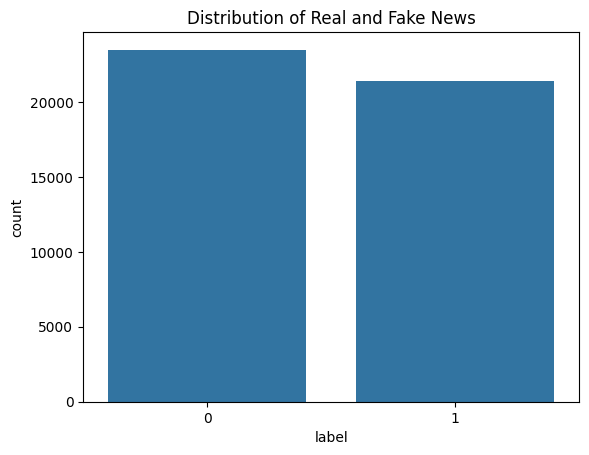

In [11]:
sns.countplot(data=df,x='label')
plt.title("Distribution of Real and Fake News")
plt.show()

In [12]:
x=df['text']
y=df['label']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
vectorizer=TfidfVectorizer(max_df=0.07)
x_train_vec=vectorizer.fit_transform(x_train)
x_test_vec=vectorizer.transform(x_test)

In [13]:
from sklearn.linear_model import LogisticRegression
#passive Aggresive model

pa_model=PassiveAggressiveClassifier(max_iter=50)
pa_model.fit(x_train_vec,y_train)
pa_pred=pa_model.predict(x_test_vec)

# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(x_train_vec, y_train)
lr_pred = lr_model.predict(x_test_vec)

# Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(x_train_vec, y_train)
nb_pred = nb_model.predict(x_test_vec)

In [14]:
from sklearn.metrics import classification_report
def evaluate(y_true,y_pred,model):
    print(f"-----------{model}----------")
    print("Accuracy of a model:",accuracy_score(y_true,y_pred))
    print("Classification report\n:",classification_report(y_true,y_pred))
    print("confusion matrix:\n",confusion_matrix(y_true,y_pred))
    print("\n")
evaluate(y_test,pa_pred,"Passive-aggressive")
evaluate(y_test,lr_pred,"Linear Regression")
evaluate(y_test,nb_pred,"Naive Bayes")

-----------Passive-aggressive----------
Accuracy of a model: 0.9608017817371938
Classification report
:               precision    recall  f1-score   support

           0       0.97      0.95      0.96      4645
           1       0.95      0.97      0.96      4335

    accuracy                           0.96      8980
   macro avg       0.96      0.96      0.96      8980
weighted avg       0.96      0.96      0.96      8980

confusion matrix:
 [[4422  223]
 [ 129 4206]]


-----------Linear Regression----------
Accuracy of a model: 0.9646993318485524
Classification report
:               precision    recall  f1-score   support

           0       0.96      0.97      0.97      4645
           1       0.97      0.96      0.96      4335

    accuracy                           0.96      8980
   macro avg       0.97      0.96      0.96      8980
weighted avg       0.96      0.96      0.96      8980

confusion matrix:
 [[4523  122]
 [ 195 4140]]


-----------Naive Bayes----------
Accuracy o

In [15]:
def predict_news(news_text, model, vec):
    cleaned = clean_text(news_text)
    vector = vec.transform([cleaned])
    prediction = model.predict(vector)
    return prediction[0]

sample = "Breaking: NASA finds alien life on Mars!"
print("Prediction:", predict_news(sample, pa_model, vectorizer))


Prediction: 0
